Introduction to GeoPandas
=============================

<a id='Table-of-Contents'></a>
Table of Contents
------------------
 - [Requesting a dataset remotely](#requestfileremotely)
 - [Supported filetypes geopandas will open](#supported_drivers)
 - [Inspect file returned from remote](#inspectfile)
 - [Pandas to GeoPandas: the GeoSeries and GeoDataFrame](#pan2geo)
 - [GeoSeries attributes](#geoseriesattrib)
  - [area](#area)
  - [bounds](#bounds)
  - [area, bounds, is_valid, crs, and centroid use examples](#otheruseexamples)
 - [Toward mapping: a basic GeoPandas workflow](#workflow)
  - [supported drivers for to_file](#drivers)
  - [write to shapefile](#writeshape)
  - [write to geojson](#writegeojson)
 - [Plotting geospatial data](#plotgeo)
  - [make sub-selections of a DataFrame](#subselections)
  - [write sub-selection to shapefile](#writesubselect)
  - [read shapefile](#readshape1)
  - [check if json data file exist and delete if exist](#checkfile)
  - [write geojson](#writegeojson2)
  - [set X and Y axis limits with Matplotlib](#setxyaxis)
 - [Adjusting/managing projections](#adjustproj)
  - [create a new GeoDataFrame of Portugal](#sliceportugal)
  - [set dataframe to new projection](#setprojection)
  - [plot Portugal](#plotportugal)
  - [add the europe GeoDataFrame as the basemap](#baseeurope)

***

#### Additional Examples
 - [Adding a background tile map to plots](#tilemaps)
 - [Plotting with Geoplot](#plotgeoplot)
  - [use size as a visual variable using cartogram](#cartogram)
  - [use color as a visual variable - specify choropleth](#chloropleth)
  - [re-project data into any of the map projections provided by CartoPy](#cartopy) 
 - [Aggregate geometric features - dissolve function](#dissolve)
  - [aggregate the geodataframe by continents](#aggcontinent)
  - [plot the new geodataframe](#plotnewgeo)
  - [add color based on the pop_est for each continent; display legend to the right of the plot-legend_kwds](#displegend)
 - [Creating a GeoDataFrame from a DataFrame with coordinates](#Creating_GeoDataFrame_DataFrame_with_coordinates)
  - [create a Shapely object for geodataframe](#GeoDataFrame_needs_shapely_object)
  - [transform tuples to Point](#transform_tuples)
  - [create the GeoDataFrame](#CreateGeoDataFrame)
  - [plot geodataframe coordinates](#plot_geodataframe)
  - [plot a specific column](#plot_column)


***

#### Python Library Initialization

##### View the [README](https://github.com/MarkCruse/geopandas-101) file for instuctions on library installation.

In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import geoplot
import fiona
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import os

<a id='requestfileremotely'></a>
#### Request a dataset from a remote server
A packed archive collection of Shapefiles contained within a .zip file.

In [2]:
countries_raw = gpd.read_file('https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_countries.zip')

<a id='supported_drivers'></a>
#### For a __list of supported drivers__ geopandas (fiona) will open, use the following command:
`fiona.supported_drivers`

<a id='inspectfile'></a>
#### Inspect the object returned from read_file()

In [3]:
type(countries_raw)

geopandas.geodataframe.GeoDataFrame

In [4]:
countries_raw.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 95 columns):
featurecla    241 non-null object
scalerank     241 non-null int64
LABELRANK     241 non-null int64
SOVEREIGNT    241 non-null object
SOV_A3        241 non-null object
ADM0_DIF      241 non-null int64
LEVEL         241 non-null int64
TYPE          241 non-null object
ADMIN         241 non-null object
ADM0_A3       241 non-null object
GEOU_DIF      241 non-null int64
GEOUNIT       241 non-null object
GU_A3         241 non-null object
SU_DIF        241 non-null int64
SUBUNIT       241 non-null object
SU_A3         241 non-null object
BRK_DIFF      241 non-null int64
NAME          241 non-null object
NAME_LONG     241 non-null object
BRK_A3        241 non-null object
BRK_NAME      241 non-null object
BRK_GROUP     3 non-null object
ABBREV        241 non-null object
POSTAL        241 non-null object
FORMAL_EN     229 non-null object
FORMAL_FR     5 non-null object
NAME_CIAWF    

In [5]:
countries_raw.describe()

,scalerank,LABELRANK,ADM0_DIF,LEVEL,GEOU_DIF,SU_DIF,BRK_DIFF,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,...,ADM0_A3_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID
count,241.000000,241.000000,241.000000,241.0,241.0,241.000000,241.000000,241.000000,241.000000,241.000000,...,241.0,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,2.410000e+02
mean,1.867220,4.149378,0.211618,2.0,0.0,0.008299,0.029046,3.348548,3.622407,3.858921,...,-99.0,8.908714,10.082988,5.041494,-75.651452,-16.012448,0.085892,3.684647,8.531120,1.159321e+09
std,1.316167,1.432687,0.409306,0.0,0.0,0.090908,0.168284,1.815124,1.909013,2.184418,...,0.0,4.213071,6.073968,1.496642,43.030063,37.652410,0.677963,1.069605,1.155993,3.354489e+02
min,1.000000,2.000000,0.000000,2.0,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,...,-99.0,4.000000,4.000000,3.000000,-99.000000,-99.000000,0.000000,1.700000,5.200000,1.159320e+09
25%,1.000000,3.000000,0.000000,2.0,0.0,0.000000,0.000000,2.000000,2.000000,2.000000,...,-99.0,6.000000,6.000000,4.000000,-99.000000,1.000000,0.000000,3.000000,8.000000,1.159321e+09
50%,1.000000,4.000000,0.000000,2.0,0.0,0.000000,0.000000,3.000000,4.000000,4.000000,...,-99.0,8.000000,8.000000,5.000000,-99.000000,1.000000,0.000000,4.000000,9.000000,1.159321e+09
75%,3.000000,6.000000,0.000000,2.0,0.0,0.000000,0.000000,5.000000,5.000000,6.000000,...,-99.0,10.000000,12.000000,6.000000,-99.000000,1.000000,0.000000,4.500000,9.500000,1.159321e+09
max,6.000000,7.000000,1.000000,2.0,0.0,1.000000,1.000000,7.000000,8.000000,9.000000,...,-99.0,25.000000,35.000000,13.000000,6.000000,1.000000,7.000000,6.500000,11.000000,1.159321e+09


In [6]:
countries_raw.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,Zimbabwe,ZWE,...,짐바브웨,Zimbabwe,Zimbabwe,Zimbábue,Зимбабве,Zimbabwe,Zimbabve,Zimbabwe,辛巴威,POLYGON ((31.28789062500002 -22.40205078125001...
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,ZMB,...,잠비아,Zambia,Zambia,Zâmbia,Замбия,Zambia,Zambiya,Zambia,赞比亚,"POLYGON ((30.39609375000001 -15.64306640625, 3..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,YEM,...,예멘,Jemen,Jemen,Iémen,Йемен,Jemen,Yemen,Yemen,也门,"(POLYGON ((53.08564453125001 16.648388671875, ..."
3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,Vietnam,VNM,...,베트남,Vietnam,Wietnam,Vietname,Вьетнам,Vietnam,Vietnam,Việt Nam,越南,"(POLYGON ((104.06396484375 10.3908203125, 104...."
4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,Venezuela,VEN,...,베네수엘라,Venezuela,Wenezuela,Venezuela,Венесуэла,Venezuela,Venezuela,Venezuela,委內瑞拉,(POLYGON ((-60.82119140624999 9.13837890624999...



[top](#Table-of-Contents)

<a id='pan2geo'></a>
### Pandas to GeoPandas: the GeoSeries and GeoDataFrame
Access and select a single column's values such as the ADMIN names and assign the result to a variable (dot notation would work here too):

In [7]:
admin_names = countries_raw['ADMIN']
admin_names

0             Zimbabwe
1               Zambia
2                Yemen
3              Vietnam
4            Venezuela
            ...       
236            Albania
237        Afghanistan
238    Siachen Glacier
239         Antarctica
240       Sint Maarten
Name: ADMIN, Length: 241, dtype: object

In [8]:
type(admin_names) 

pandas.core.series.Series

In [9]:
geoms = countries_raw.geometry
type(geoms)

geopandas.geoseries.GeoSeries

[top](#Table-of-Contents)

<a id='geoseriesattrib'></a>
### GeoSeries attributes
For a full list of all available attributes see the [GeoSeries Reference](http://geopandas.org/reference.html)

[top](#Table-of-Contents)
<a id='area'></a>
### area
List the area of all the countries in the `countries` dataset

In [10]:
countries_raw.area.head()

0    33.389352
1    62.886921
2    38.204311
3    27.856863
4    74.594288
dtype: float64

[top](#Table-of-Contents)
<a id='bounds'></a>
### bounds
tuple of max and min coordinates on each axs to each shape

In [11]:
countries_raw.bounds.head()

,minx,miny,maxx,maxy
0,25.224023,-22.402051,33.006738,-15.643066
1,21.978906,-18.041504,33.661523,-8.193652
2,42.549023,12.318994,54.511133,18.996143
3,102.127441,8.583252,109.444922,23.345215
4,-73.366211,0.687988,-59.828906,12.177881


[top](#Table-of-Contents)
<a id='otheruseexamples'></a>
### area, bounds, is_valid, crs, and centroid use examples
`area:` shape area (units of projection – see [projections](http://geopandas.org/projections.html)  
`bounds:` tuple of max and min coordinates on each axis for each shape  
`total_bounds:` tuple of max and min coordinates on each axis for entire GeoSeries  
`geom_type:` type of geometry.  
`is_valid:` tests if coordinates make a shape that is reasonable geometric shape (according to this).  

In [12]:
china = countries_raw.loc[countries_raw['ADMIN'] == 'China']
print('area: ', china.area) 
print('bounds: ', china.bounds)
print('Is valid?: ', china.is_valid)
print('CRS: ', china.crs)
print('centroid: ', china.centroid)

area:  195    950.981107
dtype: float64
bounds:            minx       miny        maxx       maxy
195  73.607324  18.218262  134.752344  53.555615
Is valid?:  195    True
dtype: bool
CRS:  {'init': 'epsg:4326'}
centroid:  195    POINT (103.8190731458241 36.56176537925268)
dtype: object


[top](#Table-of-Contents)
<a id='workflow'></a>
### Toward mapping: a basic GeoPandas workflow

<a id='drivers'></a>
#### supported drivers to use with GeoDataFrame.tofile()

Writing the geo dataframe to a file is as simple as `GeoDataFrame.to_file()` 
This command will write the required Shapefiles to disk.  
For a list of available formats use: 

In [13]:
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r'}

<a id='writeshape'></a>
#### write a shapefile
The command: `countries_raw.to_file('shapes/countries/')` 
 - Creates a new directory named countries within the current working directory
 - Writes the 3 required Shapefiles into that directory, as well as the very useful countries.shp encoding our CRS information and the less useful countires.cpg file

In [14]:
countries_raw.to_file('shapes/countries')

#### reload the countries dataframe from shapefile

In [15]:
countries = gpd.read_file('./shapes/countries/countries.shp')
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,Zimbabwe,ZWE,...,????,Zimbabwe,Zimbabwe,Zimbábue,????????,Zimbabwe,Zimbabve,Zimbabwe,???,POLYGON ((31.28789062500002 -22.40205078125001...
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,ZMB,...,???,Zambia,Zambia,Zâmbia,??????,Zambia,Zambiya,Zambia,???,"POLYGON ((30.39609375000001 -15.64306640625, 3..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,YEM,...,??,Jemen,Jemen,Iémen,?????,Jemen,Yemen,Yemen,??,"(POLYGON ((53.08564453125001 16.648388671875, ..."
3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,Vietnam,VNM,...,???,Vietnam,Wietnam,Vietname,???????,Vietnam,Vietnam,Vi?t Nam,??,"(POLYGON ((104.06396484375 10.3908203125, 104...."
4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,Venezuela,VEN,...,?????,Venezuela,Wenezuela,Venezuela,?????????,Venezuela,Venezuela,Venezuela,????,(POLYGON ((-60.82119140624999 9.13837890624999...


[top](#Table-of-Contents)
<a id='writegeojson'></a>
#### writing GeoJSON to file


In [16]:
if os.path.exists('data/countries.json'):
  os.remove('data/countries.json')

#### To write to GeoJSON: 

#### An alternative way to write to GeoJSON

In [17]:
with open('./data/countries.json', 'w') as f:
    f.write(countries_raw.to_json())

#### reading geojson doesnt work for files created using `to_file` method.  Alternate write file reads?  Solution below.  
The file created using the `to_file` method loads into geojson.io.  However geojson.io won't read the file created using the `write` method. Even more strange is the geojson.io won't read the file created using the `write` method.  
__Solution:__ edit the file created using the `to_file` method, removing the line `"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },`

In [18]:
countries = gpd.read_file('./data/countries.json')

countries.head()

,id,ABBREV,ABBREV_LEN,ADM0_A3,ADM0_A3_IS,ADM0_A3_UN,ADM0_A3_US,ADM0_A3_WB,ADM0_DIF,ADMIN,...,WB_A2,WB_A3,WIKIDATAID,WIKIPEDIA,WOE_ID,WOE_ID_EH,WOE_NOTE,featurecla,scalerank,geometry
0,0,Zimb.,5,ZWE,ZWE,-99,ZWE,-99,0,Zimbabwe,...,ZW,ZWE,Q954,-99,23425004,23425004,Exact WOE match as country,Admin-0 country,1,POLYGON ((31.28789062500002 -22.40205078125001...
1,1,Zambia,6,ZMB,ZMB,-99,ZMB,-99,0,Zambia,...,ZM,ZMB,Q953,-99,23425003,23425003,Exact WOE match as country,Admin-0 country,1,"POLYGON ((30.39609375000001 -15.64306640625, 3..."
2,2,Yem.,4,YEM,YEM,-99,YEM,-99,0,Yemen,...,RY,YEM,Q805,-99,23425002,23425002,Exact WOE match as country,Admin-0 country,1,"(POLYGON ((53.08564453125001 16.648388671875, ..."
3,3,Viet.,5,VNM,VNM,-99,VNM,-99,0,Vietnam,...,VN,VNM,Q881,-99,23424984,23424984,Exact WOE match as country,Admin-0 country,3,"(POLYGON ((104.06396484375 10.3908203125, 104...."
4,4,Ven.,4,VEN,VEN,-99,VEN,-99,0,Venezuela,...,VE,VEN,Q717,-99,23424982,23424982,Exact WOE match as country,Admin-0 country,5,(POLYGON ((-60.82119140624999 9.13837890624999...


In [19]:
countries.crs

{'init': 'epsg:4326'}

[top](#Table-of-Contents)
<a id='plotgeo'></a>
### Plotting geospatial data

#### use the `.plot()` method to produce a basic visualization of our dataset

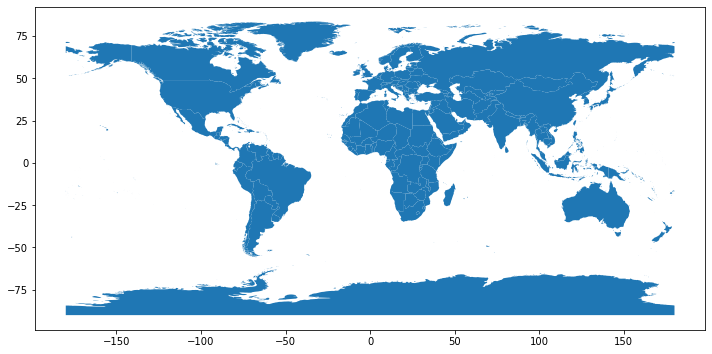

In [20]:
ax = countries.plot(figsize=(12,12));

[top](#Table-of-Contents)
<a id='subselections'></a>
#### make sub-selections of a DataFrame
For example, if we only want the countries with the `CONTINENT` attribute of `Europe`, we can select those, assign them to a new variable, and even write them back out to disk as a GeoJSON:

In [21]:
europe = countries.loc[countries['CONTINENT'] == 'Europe']
europe.head()

,id,ABBREV,ABBREV_LEN,ADM0_A3,ADM0_A3_IS,ADM0_A3_UN,ADM0_A3_US,ADM0_A3_WB,ADM0_DIF,ADMIN,...,WB_A2,WB_A3,WIKIDATAID,WIKIPEDIA,WOE_ID,WOE_ID_EH,WOE_NOTE,featurecla,scalerank,geometry
5,5,Vat.,4,VAT,VAT,-99,VAT,-99,0,Vatican,...,-99,-99,Q237,0,23424986,23424986,Exact WOE match as country,Admin-0 country,6,"POLYGON ((12.43916015625001 41.898388671875, 1..."
28,28,Jey.,4,JEY,JEY,-99,JEY,-99,1,Jersey,...,JG,CHI,Q785,-99,23424857,23424857,Exact WOE match as country,Admin-0 country,4,"POLYGON ((-2.018652343749977 49.23125, -2.0099..."
29,29,Guern.,6,GGY,GGY,-99,GGY,-99,1,Guernsey,...,JG,CHI,Q25230,-99,23424827,23424827,Exact WOE match as country,Admin-0 country,4,POLYGON ((-2.512304687499977 49.49453124999999...
30,30,IoMan,5,IMN,IMN,-99,IMN,-99,1,Isle of Man,...,IM,IMY,Q9676,-99,23424847,23424847,Exact WOE match as country,Admin-0 country,3,"POLYGON ((-4.412060546874983 54.1853515625, -4..."
31,31,U.K.,4,GBR,GBR,-99,GBR,-99,1,United Kingdom,...,GB,GBR,Q145,-99,-90,23424975,Eh ID includes Channel Islands and Isle of Man...,Admin-0 country,1,"(POLYGON ((-2.667675781249983 51.622998046875,..."


[top](#Table-of-Contents)
<a id='writesubselect'></a>
#### write sub-selection to shapefile

In [22]:
europe.to_file('shapes/europe')

<a id='readshape1'></a>
#### read sub-selection from shapefile

In [23]:
europe = gpd.read_file('./shapes/europe/europe.shp')
europe.head()

,id,ABBREV,ABBREV_LEN,ADM0_A3,ADM0_A3_IS,ADM0_A3_UN,ADM0_A3_US,ADM0_A3_WB,ADM0_DIF,ADMIN,...,WB_A2,WB_A3,WIKIDATAID,WIKIPEDIA,WOE_ID,WOE_ID_EH,WOE_NOTE,featurecla,scalerank,geometry
0,5,Vat.,4,VAT,VAT,-99,VAT,-99,0,Vatican,...,-99,-99,Q237,0,23424986,23424986,Exact WOE match as country,Admin-0 country,6,"POLYGON ((12.43916015625001 41.898388671875, 1..."
1,28,Jey.,4,JEY,JEY,-99,JEY,-99,1,Jersey,...,JG,CHI,Q785,-99,23424857,23424857,Exact WOE match as country,Admin-0 country,4,"POLYGON ((-2.018652343749977 49.23125, -2.0099..."
2,29,Guern.,6,GGY,GGY,-99,GGY,-99,1,Guernsey,...,JG,CHI,Q25230,-99,23424827,23424827,Exact WOE match as country,Admin-0 country,4,POLYGON ((-2.512304687499977 49.49453124999999...
3,30,IoMan,5,IMN,IMN,-99,IMN,-99,1,Isle of Man,...,IM,IMY,Q9676,-99,23424847,23424847,Exact WOE match as country,Admin-0 country,3,"POLYGON ((-4.412060546874983 54.1853515625, -4..."
4,31,U.K.,4,GBR,GBR,-99,GBR,-99,1,United Kingdom,...,GB,GBR,Q145,-99,-90,23424975,Eh ID includes Channel Islands and Isle of Man...,Admin-0 country,1,"(POLYGON ((-2.667675781249983 51.622998046875,..."


[top](#Table-of-Contents)
<a id='checkfile'></a>
#### check if json data file exist and delete if exist

In [24]:
if os.path.exists('data/europe.json'):
  os.remove('data/europe.json')

[top](#Table-of-Contents)
<a id='writegeojson2'></a>
#### write sub-selection to geojson

In [25]:
#europe.to_file('./data/europe.json', driver='GeoJSON')
#Alternative write method -> 
with open('data/europe.json', 'w') as f: f.write(europe.to_json())

#### read the shapefile 

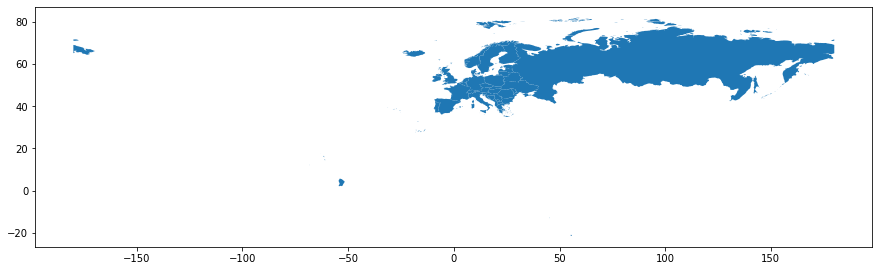

In [26]:
europe = gpd.read_file('data/europe.json')
europe.plot(figsize=(15,15));

The output is not a particularly helpful visual (pretending that our intent is to focus on continental Europe):

[top](#Table-of-Contents)
<a id='setxyaxis'></a>
#### set X and Y axis limits with Matplotlib

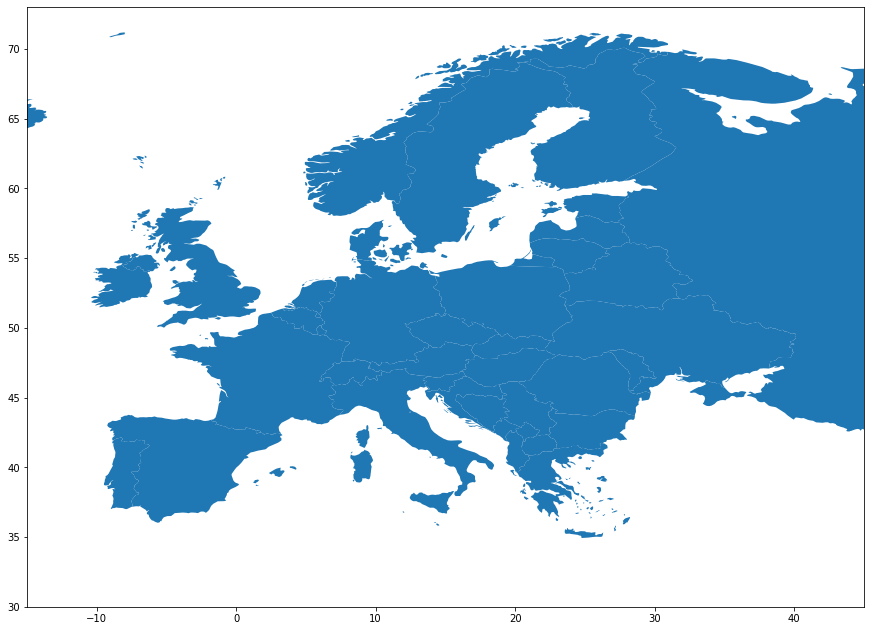

In [27]:
ax = europe.plot(figsize=(15,15))
ax.set(xlim=(-15,45), ylim=(30,73));

[top](#Table-of-Contents)
<a id='adjustproj'></a>
## Adjusting/managing projections

__Choose a country in Europe and get the projection__ from [EPSG.io](https://epsg.io/) This web site allows one to search for various map projections to obtain both their EPSG code (which GeoPandas handles as the preferred code) as well as the PROJ.4 definition.

<a id='setprojection'></a>
#### set dataframe to new projection

In [28]:
europe.to_crs(epsg=3763, inplace=True)
europe.crs

{'init': 'epsg:3763', 'no_defs': True}

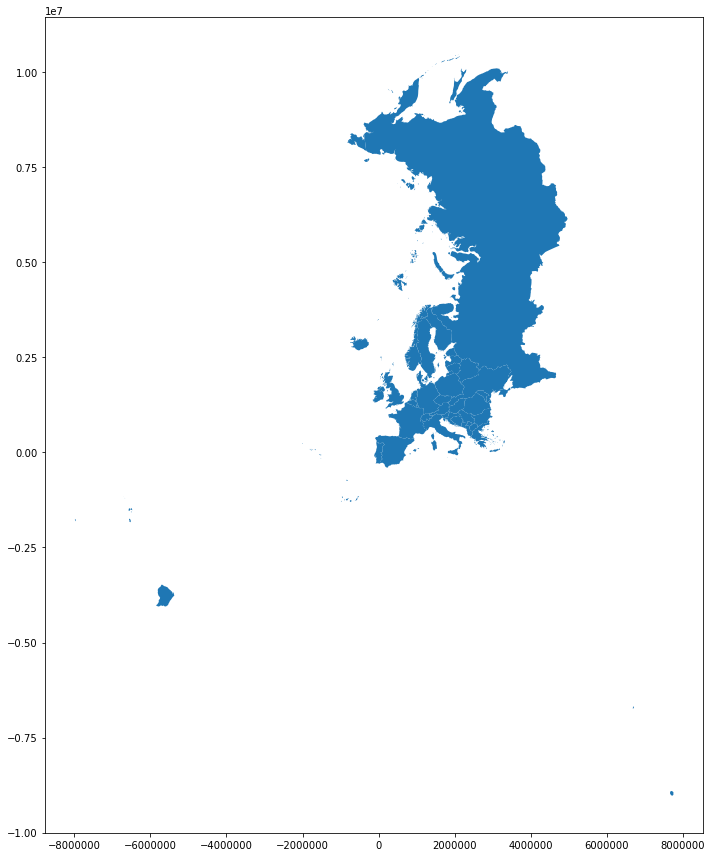

In [29]:
europe.plot(figsize=(15,15));

[top](#Table-of-Contents)
<a id='sliceportugal'></a>
#### create a new GeoDataFrame of Portugal
by slicing it from the europe GeoDataFrame (and remove Portugal from europe):

In [30]:
portugal = europe[europe['ADMIN'] == "Portugal"]
europe = europe[europe['ADMIN'] != "Portugal"]

[top](#Table-of-Contents)
<a id='plotportugal'></a>
#### plot Portugal

In [31]:
portugal.bounds

,minx,miny,maxx,maxy
15,-2.003755e+06,-745274.483259,160288.077943,274212.075787


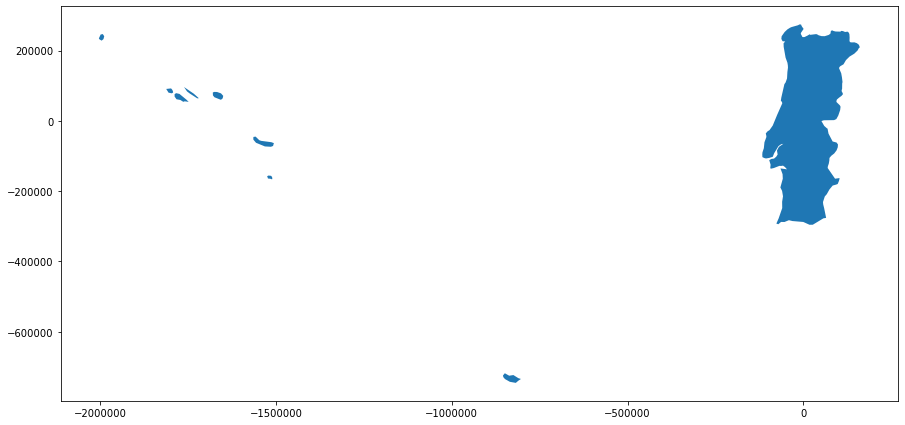

In [32]:
portugal.plot(figsize=(15,15));

[top](#Table-of-Contents)
<a id='baseeurope'></a>
#### add the europe GeoDataFrame as the basemap  
plot Portugal on top of it, using some basic color properties to help create figure-ground  
adjust the axis limits using values of meters

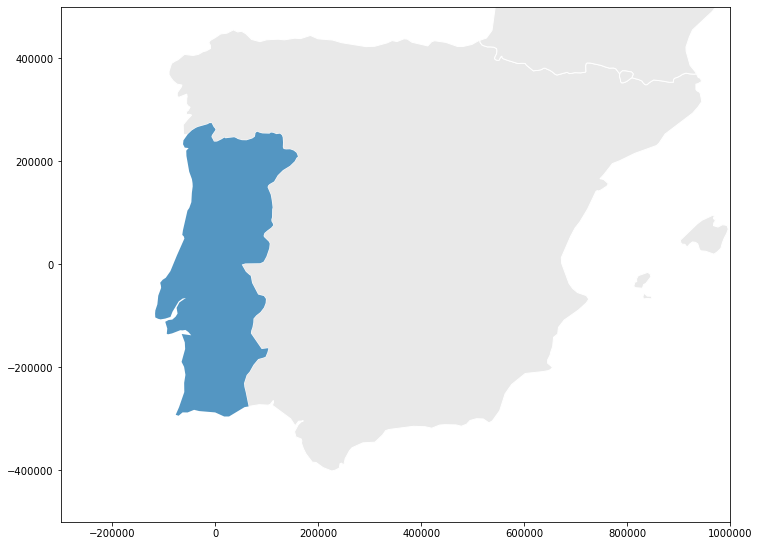

In [33]:
base = europe.plot(figsize=(12,12), edgecolor='white', color='#e9e9e9')
base.set(xlim=(-300000,1000000), ylim=(-500000, 500000))
portugal.plot(ax=base, color='#5496c2');

***
[top](#Table-of-Contents)
<a id='tilemaps'></a>
## Adding a background tile map to plots 
[GeoPandas 0.4.0 documentation](http://geopandas.org/gallery/plotting_basemap_background.html)

In [34]:
%matplotlib inline

import pandas as pd
import geopandas as gpd

#### read data 

In [35]:
europe = gpd.read_file('data/europe.json')

#### set dataframe to a target area (Portugal in this example)

In [36]:
portugal = europe[europe['ADMIN'] == "Portugal"].copy()

#### change crs to web mercator

In [37]:
portugal.to_crs(epsg=3857, inplace=True)
portugal.crs

{'init': 'epsg:3857', 'no_defs': True}

#### examine the area available for portugal

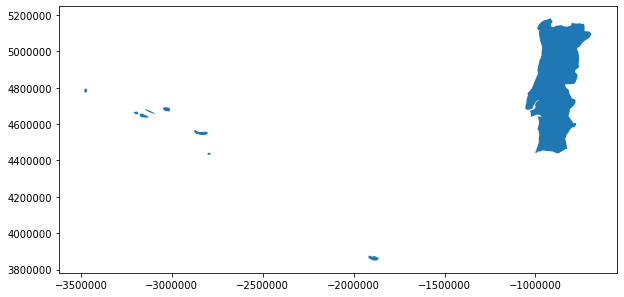

In [38]:
portugal.plot(figsize=(10,10));

#### contextily helper function

Define a small helper function that uses `contextily <https://github.com/darribas/contextily>`  
to add a map as background to an existing plot: 



In [39]:
import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

#### a large area will take a longer time to load the basemap

/Users/mark/anaconda3/envs/sandbox/lib/python3.7/site-packages/contextily/tile.py:199: FutureWarning: The url format using 'tileX', 'tileY', 'tileZ' as placeholders is deprecated. Please use '{x}', '{y}', '{z}' instead.
  FutureWarning,


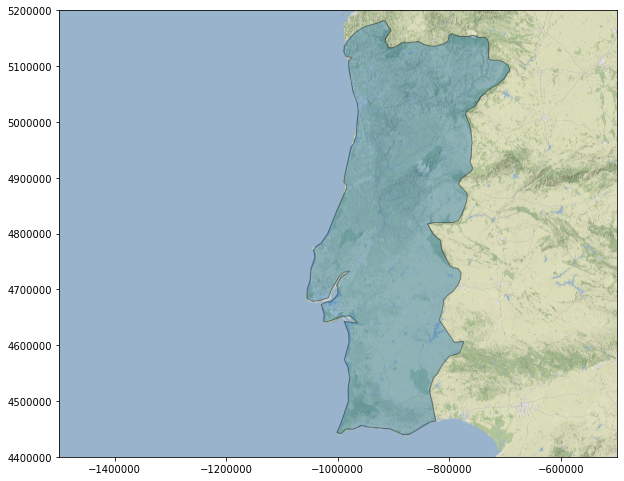

In [40]:
base = portugal.plot(figsize=(10, 15), alpha=0.4, edgecolor='k')
base.set(xlim=(-1500000,-500000), ylim=(4400000, 5200000))
add_basemap(ax=base, zoom=11)

#### select a smaller area

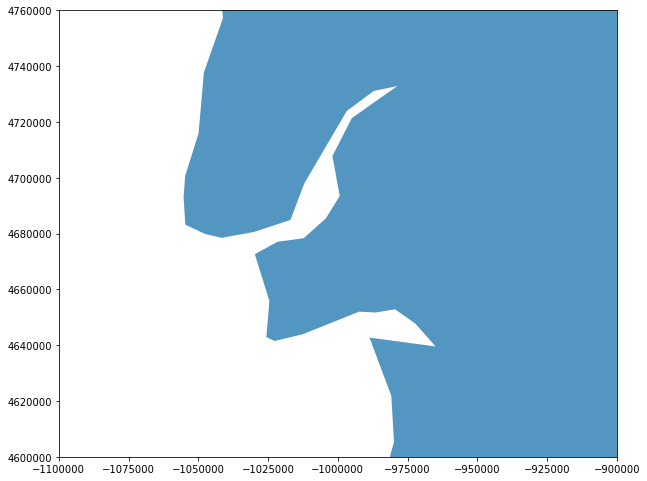

In [41]:
base = portugal.plot(figsize=(10,10), edgecolor='white', color='#e9e9e9')
base.set(xlim=(-1100000,-900000), ylim=(4600000, 4760000))
portugal.plot(ax=base, color='#5496c2')

#### add in the basemap

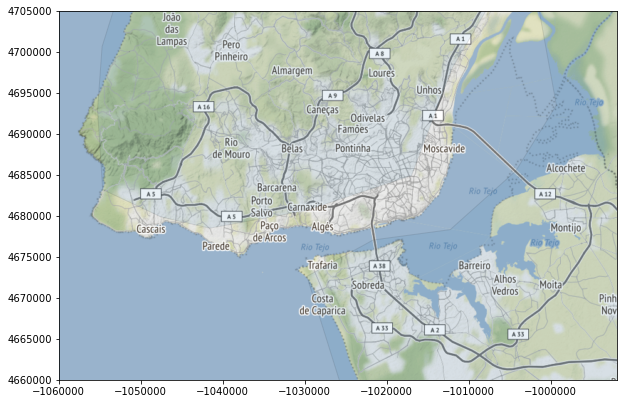

In [42]:
base = portugal.plot(figsize=(10, 15), alpha=0.09, edgecolor='k')
base.set(xlim=(-1060000,-991950), ylim=(4660000, 4705000))
add_basemap(ax=base, zoom=11)

#### Portugual - the island of [Madeira](https://en.wikipedia.org/wiki/Madeira)

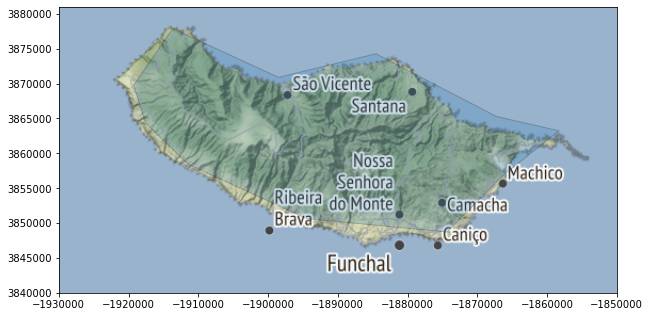

In [43]:
base = portugal.plot(figsize=(10, 10), alpha=0.2, edgecolor='k')
base.set(xlim=(-1930000,-1850000), ylim=(3840000, 3881000))
add_basemap(ax=base, zoom=10)

***
[top](#Table-of-Contents)
<a id='plotgeoplot'></a>
## Plotting with Geoplot and GeoPandas
[GeoPandas 0.4.0 documentation](http://geopandas.org/gallery/plotting_with_geoplot.html#sphx-glr-gallery-plotting-with-geoplot-py)

In [44]:
countries = gpd.read_file('data/countries.json')

<a id='cartogram'></a>
#### use size as a visual variable using `cartogram`
Here are population estimates for countries in Africa.

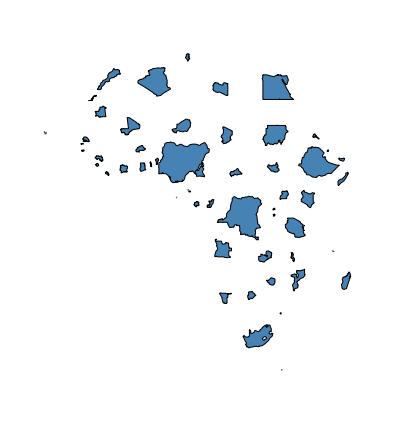

In [45]:
geoplot.cartogram(countries[countries['CONTINENT'] == 'Africa'], scale='POP_EST', limits=(0.2, 1), figsize=(7, 8));

<a id='chloropleth'></a>
#### use color as a visual variable - specify choropleth
Here we sort population estimate by country into five buckets by color.

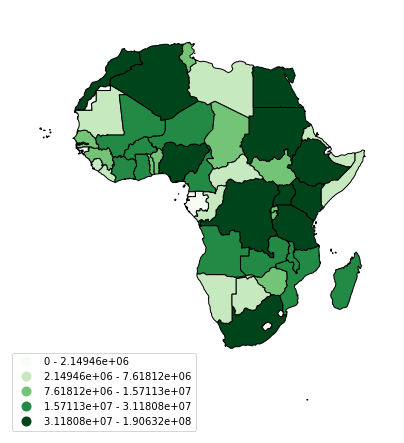

In [46]:
geoplot.choropleth(countries[countries['CONTINENT'] == 'Africa'], hue='POP_EST', cmap='Greens', figsize=(7,8), legend=True);

[top](#Table-of-Contents)
<a id='cartopy'></a>
## Re-project data into any of the map projections provided by CartoPy

In [47]:
import geoplot
import geopandas

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)

#### Start out by replicating the basic GeoPandas world plot using Geoplot.

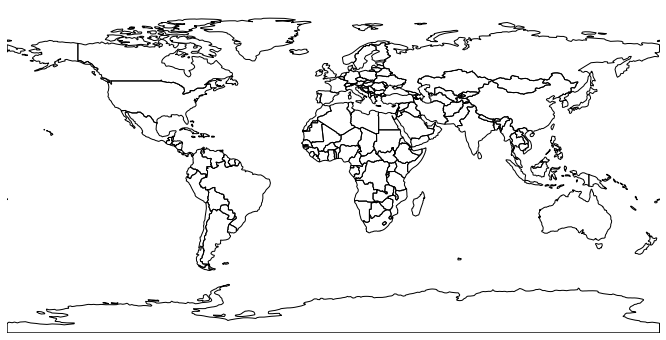

In [48]:
geoplot.polyplot(df, figsize=(12,6));

#### Orthographic

/Users/mark/anaconda3/envs/sandbox/lib/python3.7/site-packages/geoplot/geoplot.py:619: UserWarning: Plot extent lies outside of the Orthographic projection's viewport. Defaulting to global extent.
  'Plot extent lies outside of the Orthographic projection\'s '


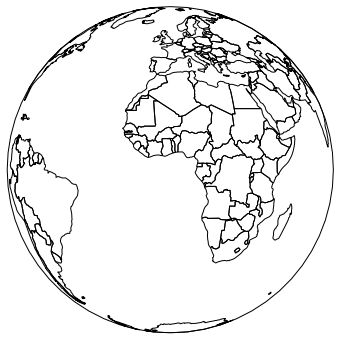

In [49]:
ax = geoplot.polyplot(df, projection=gcrs.Orthographic(), figsize=(12,6))
ax.set_global()
ax.outline_patch.set_visible(True)

#### PlateCarree

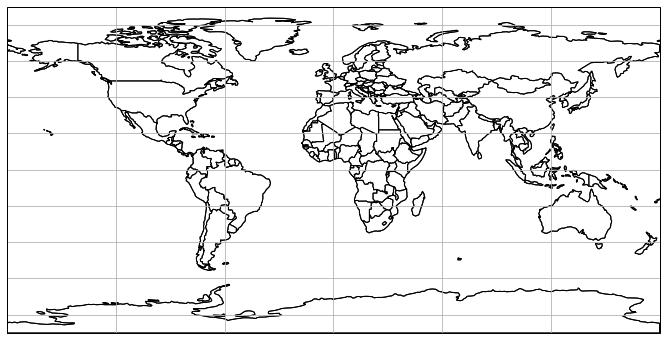

In [50]:
ax = geoplot.polyplot(df, projection=gcrs.PlateCarree(), figsize=(12, 6))

ax.coastlines(resolution='110m')
ax.gridlines()
ax.set_global()
ax.outline_patch.set_visible(True);

#### PlateCarree on 180 longitude

/Users/mark/anaconda3/envs/sandbox/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:704: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  self.set_xlim([x1, x2])


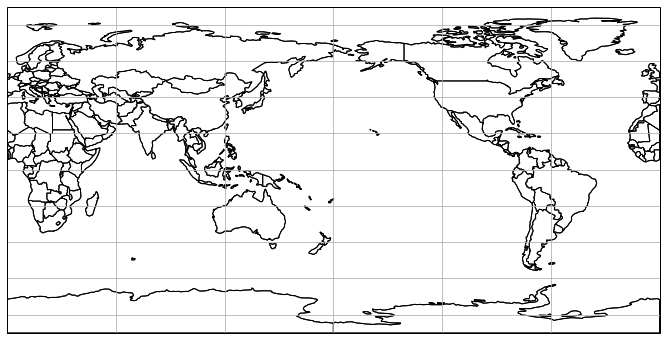

In [51]:
ax = geoplot.polyplot(df, projection=gcrs.PlateCarree(central_longitude=180), figsize=(12, 6))
ax.coastlines(resolution='110m')
ax.gridlines()
ax.set_global()
ax.outline_patch.set_visible(True);

#### AlbersEqualArea

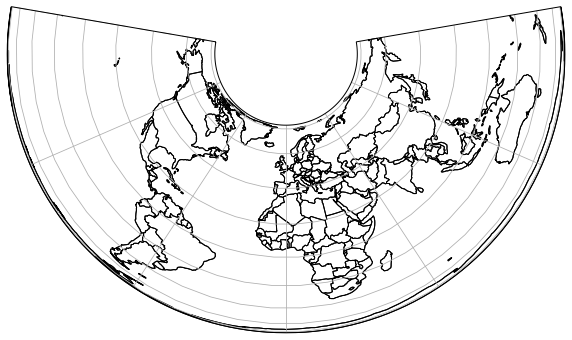

In [52]:
ax = geoplot.polyplot(df, projection=gcrs.AlbersEqualArea(), figsize=(12, 6))
ax.coastlines(resolution='110m')
ax.gridlines()
ax.set_global()
ax.outline_patch.set_visible(True);

#### Robinson

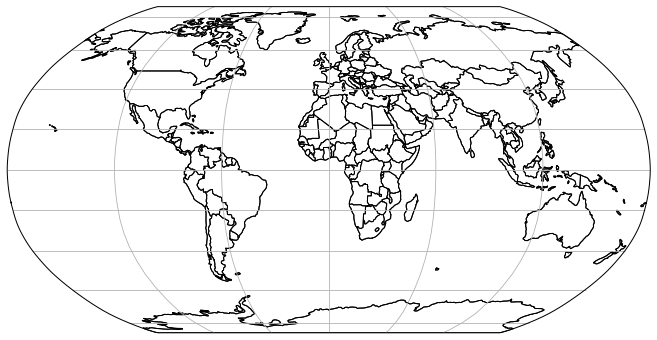

In [53]:
ax = geoplot.polyplot(df, projection=gcrs.Robinson(), figsize=(12, 6))
ax.coastlines(resolution='110m')
ax.gridlines()
ax.set_global()
ax.outline_patch.set_visible(True);

__see more 
[here](http://scitools.org.uk/cartopy/docs/latest/crs/projections.html)__

***

[top](#Table-of-Contents)
<a id='dissolve'></a>
## Aggregate geometric features
[GeoPandas 0.4.0 documentation](http://geopandas.org/aggregation_with_dissolve.html)

#### Geopandas `dissolve` function

dissolve can be thought of as doing three things:  
 (a) it dissolves all the geometries within a given group together into a single geometric feature (using the unary_union method), and  
 (b) it aggregates all the rows of data in a group using groupby.aggregate(), and  
 (c) it combines those two results.  

In [54]:
#set the matplotlib style
plt.style.use('classic')

#### read in the countries json file made earlier

In [55]:
countries = gpd.read_file('./data/countries.json')

[top](#Table-of-Contents)
<a id='aggcontinent'></a>
#### aggregate the geodataframe by continents

In [56]:
continents = countries.dissolve(by='CONTINENT')
continents  # display the entire dataframe

,geometry,id,ABBREV,ABBREV_LEN,ADM0_A3,ADM0_A3_IS,ADM0_A3_UN,ADM0_A3_US,ADM0_A3_WB,ADM0_DIF,...,UN_A3,WB_A2,WB_A3,WIKIDATAID,WIKIPEDIA,WOE_ID,WOE_ID_EH,WOE_NOTE,featurecla,scalerank
CONTINENT,,,,,,,,,,,,,,,,,,,,,
Africa,"(POLYGON ((37.85693359375 -46.94423828124999, ...",0,Zimb.,5,ZWE,ZWE,-99,ZWE,-99,0,...,716,ZW,ZWE,Q954,-99,23425004,23425004,Exact WOE match as country,Admin-0 country,1
Antarctica,"(POLYGON ((-147.58828125 -76.64980468750002, -...",239,Ant.,4,ATA,ATA,-99,ATA,-99,0,...,-099,-99,-99,Q51,-99,28289409,28289409,Exact WOE match as country,Admin-0 country,3
Asia,"(POLYGON ((96.91826171874999 -12.194140625, 96...",2,Yem.,4,YEM,YEM,-99,YEM,-99,0,...,887,RY,YEM,Q805,-99,23425002,23425002,Exact WOE match as country,Admin-0 country,1
Europe,"(POLYGON ((55.79736328125 -21.33935546875, 55....",5,Vat.,4,VAT,VAT,-99,VAT,-99,0,...,336,-99,-99,Q237,0,23424986,23424986,Exact WOE match as country,Admin-0 country,6
North America,"(POLYGON ((-81.603271484375 7.332812499999989,...",12,V.I. (U.S.),11,VIR,VIR,-99,VIR,-99,1,...,850,VI,VIR,Q11703,-99,23424985,23424985,Exact WOE match as country,Admin-0 country,3
Oceania,"(POLYGON ((158.87880859375 -54.70976562500002,...",6,Van.,4,VUT,VUT,-99,VUT,-99,0,...,548,VU,VUT,Q686,-99,23424907,23424907,Exact WOE match as country,Admin-0 country,1
Seven seas (open ocean),(POLYGON ((-26.26411132812498 -58.435156250000...,17,S.G. & Is.,10,SGS,SGS,-99,SGS,-99,1,...,-099,-99,-99,Q35086,-99,23424955,23424955,Exact WOE match as country,Admin-0 country,3
South America,"(POLYGON ((-67.5751953125 -55.8896484375, -67....",4,Ven.,4,VEN,VEN,-99,VEN,-99,0,...,862,VE,VEN,Q717,-99,23424982,23424982,Exact WOE match as country,Admin-0 country,5


[top](#Table-of-Contents)
<a id='plotnewgeo'></a>
#### Plot the new geodataframe

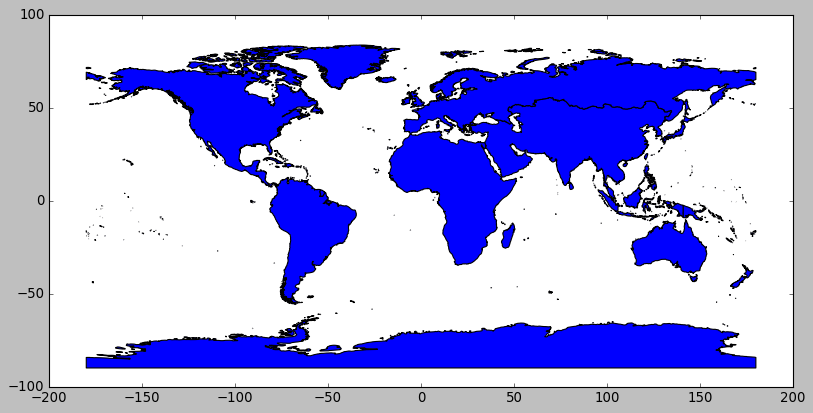

In [57]:
continents.plot(figsize=(12, 6));

<a id='displegend'></a>
### Add color based on the pop_est for each continent; display legend to the right of the plot

The way color maps are scaled can also be manipulated with the `scheme` option (if you have pysal installed).   The `scheme` option, used below, can be set to ‘equal_interval’, ‘quantiles’ or ‘percentiles’.  

Colors are set with the `cmap` option [more info in this notebook](https://github.com/MarkCruse/geopandas-101/blob/master/colormap-reference-cmap.ipynb)

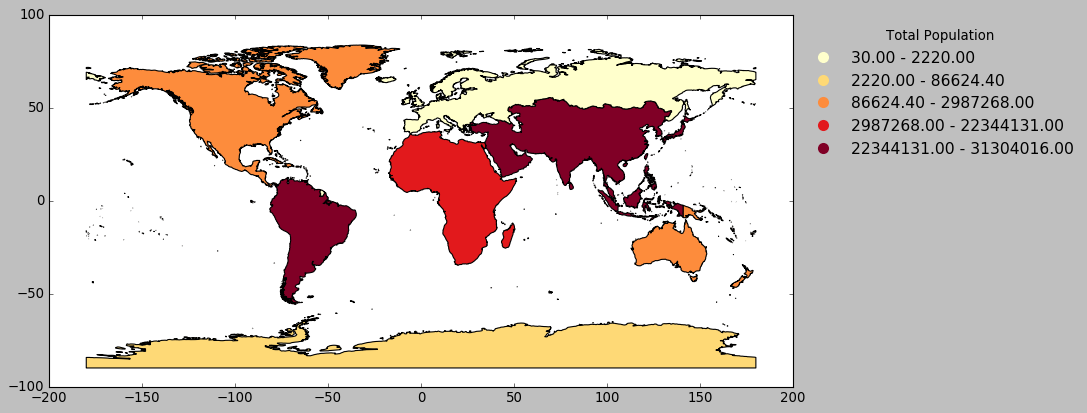

In [58]:
fig, ax = plt.subplots(1, figsize=(12,6))
continents.plot(ax=ax, column = 'POP_EST', scheme='quantiles', cmap='YlOrRd', alpha=1, legend=True,
                            legend_kwds={'loc': 'upper left',
                                         'bbox_to_anchor': (1.0, 0.8, 0.2, 0.2),
                                         'title': 'Total Population', 
                                         'fontsize': 14,
                                         'frameon': False, });

***
[top](#Table-of-Contents)


<a id='Creating_GeoDataFrame_DataFrame_with_coordinates'></a>  
## Creating a GeoDataFrame from a DataFrame with coordinates

In [59]:
from shapely.geometry import Point

### From longitudes and latitudes
First, let’s consider a DataFrame containing residences and their respective longitudes and latitudes.



In [60]:
import zipfile
# https://support.spatialkey.com/spatialkey-sample-csv-data/
zf = zipfile.ZipFile('./data/FL_insurance_sample.csv.zip') 
df = pd.read_csv(zf.open('FL_insurance_sample.csv'))

In [61]:
df.head()

,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
0,119736,FL,CLAY COUNTY,498960.0,498960.00,498960.0,498960.0,498960.00,792148.90,0.0,9979.2,0.0,0,30.102261,-81.711777,Residential,Masonry,1
1,448094,FL,CLAY COUNTY,1322376.3,1322376.30,1322376.3,1322376.3,1322376.30,1438163.57,0.0,0.0,0.0,0,30.063936,-81.707664,Residential,Masonry,3
2,206893,FL,CLAY COUNTY,190724.4,190724.40,190724.4,190724.4,190724.40,192476.78,0.0,0.0,0.0,0,30.089579,-81.700455,Residential,Wood,1
3,333743,FL,CLAY COUNTY,0.0,79520.76,0.0,0.0,79520.76,86854.48,0.0,0.0,0.0,0,30.063236,-81.707703,Residential,Wood,3
4,172534,FL,CLAY COUNTY,0.0,254281.50,0.0,254281.5,254281.50,246144.49,0.0,0.0,0.0,0,30.060614,-81.702675,Residential,Wood,1


<a id='GeoDataFrame_needs_shapely_object'></a>
#### A GeoDataFrame needs a shapely object
**Create a new column Coordinates as a tuple of Longitude and Latitude :**

In [62]:
df['Coordinates'] = list(zip(df.point_longitude, df.point_latitude))

In [63]:
df['Coordinates'].head()

0                     (-81.711777, 30.102261)
1    (-81.70766400000001, 30.063935999999998)
2            (-81.700455, 30.089578999999997)
3             (-81.70770300000001, 30.063236)
4                     (-81.702675, 30.060614)
Name: Coordinates, dtype: object

<a id='transform_tuples'></a>
#### Transform tuples to Point :

In [64]:
df['Coordinates'] = df['Coordinates'].apply(Point)

<a id='CreateGeoDataFrame'></a>
#### Create the GeoDataFrame by setting geometry with the coordinates created previously

In [65]:
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')
gdf.head()

,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity,Coordinates
0,119736,FL,CLAY COUNTY,498960.0,498960.00,498960.0,498960.0,498960.00,792148.90,0.0,9979.2,0.0,0,30.102261,-81.711777,Residential,Masonry,1,POINT (-81.711777 30.102261)
1,448094,FL,CLAY COUNTY,1322376.3,1322376.30,1322376.3,1322376.3,1322376.30,1438163.57,0.0,0.0,0.0,0,30.063936,-81.707664,Residential,Masonry,3,POINT (-81.70766400000001 30.063936)
2,206893,FL,CLAY COUNTY,190724.4,190724.40,190724.4,190724.4,190724.40,192476.78,0.0,0.0,0.0,0,30.089579,-81.700455,Residential,Wood,1,POINT (-81.70045500000001 30.089579)
3,333743,FL,CLAY COUNTY,0.0,79520.76,0.0,0.0,79520.76,86854.48,0.0,0.0,0.0,0,30.063236,-81.707703,Residential,Wood,3,POINT (-81.70770300000001 30.063236)
4,172534,FL,CLAY COUNTY,0.0,254281.50,0.0,254281.5,254281.50,246144.49,0.0,0.0,0.0,0,30.060614,-81.702675,Residential,Wood,1,POINT (-81.702675 30.060614)


#### increase decrease in total insured value (tiv)

In [66]:
gdf['tiv_total_inc_dec'] = gdf['tiv_2012'] - gdf['tiv_2011']

In [67]:
gdf.head()

,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity,Coordinates,tiv_total_inc_dec
0,119736,FL,CLAY COUNTY,498960.0,498960.00,498960.0,498960.0,498960.00,792148.90,0.0,9979.2,0.0,0,30.102261,-81.711777,Residential,Masonry,1,POINT (-81.711777 30.102261),293188.90
1,448094,FL,CLAY COUNTY,1322376.3,1322376.30,1322376.3,1322376.3,1322376.30,1438163.57,0.0,0.0,0.0,0,30.063936,-81.707664,Residential,Masonry,3,POINT (-81.70766400000001 30.063936),115787.27
2,206893,FL,CLAY COUNTY,190724.4,190724.40,190724.4,190724.4,190724.40,192476.78,0.0,0.0,0.0,0,30.089579,-81.700455,Residential,Wood,1,POINT (-81.70045500000001 30.089579),1752.38
3,333743,FL,CLAY COUNTY,0.0,79520.76,0.0,0.0,79520.76,86854.48,0.0,0.0,0.0,0,30.063236,-81.707703,Residential,Wood,3,POINT (-81.70770300000001 30.063236),7333.72
4,172534,FL,CLAY COUNTY,0.0,254281.50,0.0,254281.5,254281.50,246144.49,0.0,0.0,0.0,0,30.060614,-81.702675,Residential,Wood,1,POINT (-81.702675 30.060614),-8137.01


#### Request the state outline shapefile

In [68]:
states_raw = gpd.read_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_5m.zip')

In [69]:
states_raw.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131174431216,4592944701,"(POLYGON ((-88.04374299999999 30.517423, -88.0..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1478588231566,277723861311,"(POLYGON ((-150.242099 61.137835, -150.228774 ..."
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198661567,1027245114,"POLYGON ((-114.799683 32.593621, -114.809393 3..."
3,08,01779779,0400000US08,08,CO,Colorado,00,268425964573,1178495763,"POLYGON ((-109.060253 38.599328, -109.059541 3..."
4,12,00294478,0400000US12,12,FL,Florida,00,138911437206,31398800291,"(POLYGON ((-80.751643 24.857254, -80.729063 24..."


#### restrict data to the state of Florda

In [70]:
florida = states_raw.loc[states_raw['STATEFP'] == '12']

<a id='plot_geodataframe'></a>
#### plot geodataframe coordinates over a state-level map of Florida

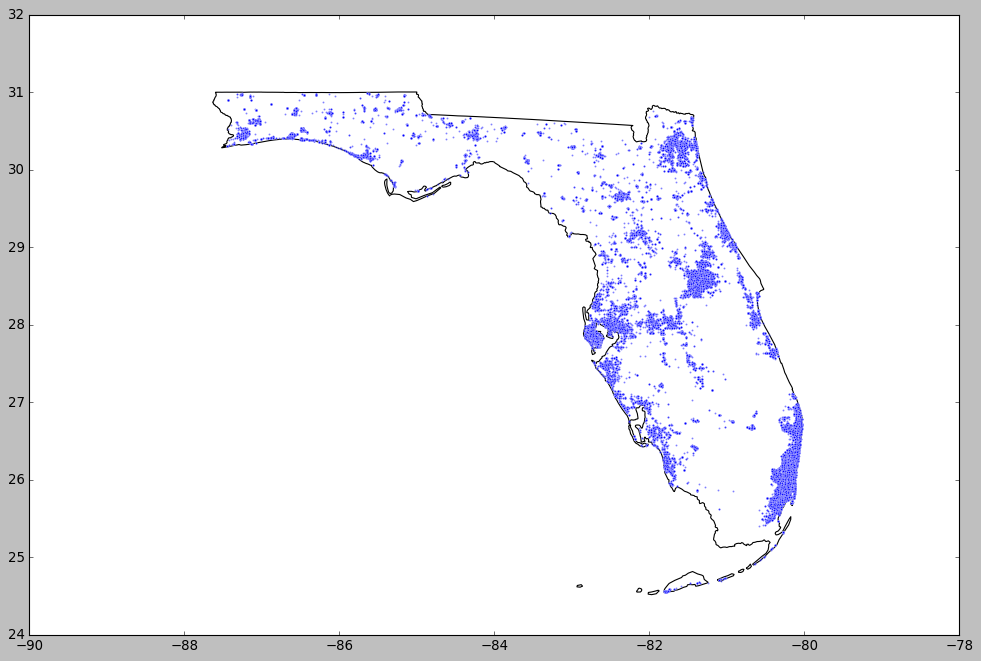

In [71]:
ax = florida.plot(figsize=(15,15), color='white', edgecolor='black');
gdf.plot(ax=ax, linewidth=0.25, edgecolor='white', markersize=3.0, alpha=0.5, color='blue');


<a id='plot_column'></a>
#### plot a specific column
using the total insured value increase-decrease created above

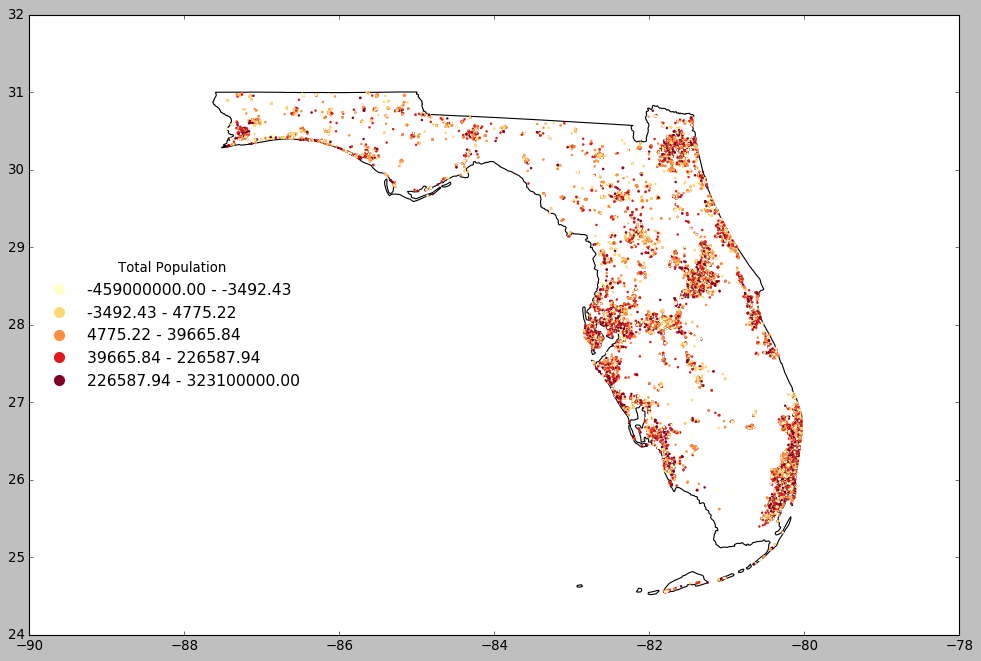

In [72]:
ax = florida.plot(figsize=(15,15), color='white', edgecolor='black');
gdf.plot(ax=ax, linewidth=0.0, markersize=5.0, column = 'tiv_total_inc_dec', 
         scheme='quantiles', cmap='YlOrRd', alpha=1.0, legend=True,
                            legend_kwds={'loc': 'center left',
                                         'title': 'Total Population', 
                                         'fontsize': 14,
                                         'frameon': False, });

***
[top](#Table-of-Contents)